Accuracy: 0.8549618320610687
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        60
           1       0.83      0.92      0.87        71

    accuracy                           0.85       131
   macro avg       0.86      0.85      0.85       131
weighted avg       0.86      0.85      0.85       131



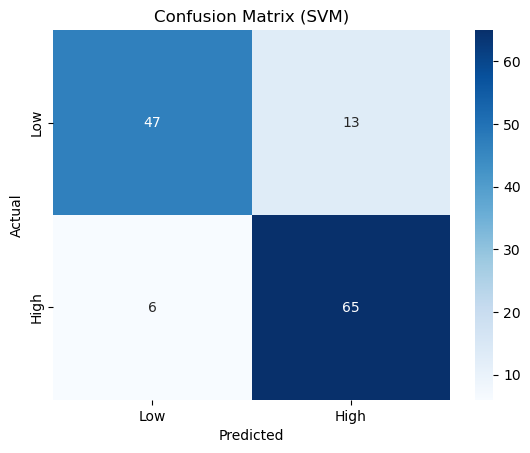

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset and preprocess
auto_mpg = sns.load_dataset('mpg').dropna()
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')
auto_mpg = auto_mpg.dropna(subset=['horsepower'])
auto_mpg['high_mpg'] = (auto_mpg['mpg'] > auto_mpg['mpg'].median()).astype(int)

# Features and target
X = auto_mpg[['horsepower']]
y = auto_mpg['high_mpg']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()
